## Applications in OpenCV

### Below Code convert the code into RGB format and then merge the RGB in one image
### Resize the image using cv2.resize() function

In [5]:
import numpy as np
import argparse
import cv2

# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required = True,
# help = "Path to the image")
# args = vars(ap.parse_args())

img = cv2.imread("scene02.jpg")
img = cv2.resize(img, (900, 720))
#define the screen resulation
# screen_res = 1280, 720
# scale_width = screen_res[0] / img.shape[1]
# scale_height = screen_res[1] / img.shape[0]
# scale = min(scale_width, scale_height)

# #resized window width and height
# window_width = int(img.shape[1] * scale)
# window_height = int(img.shape[0] * scale)

# #cv2.WINDOW_NORMAL makes the output window resizealbe
# cv2.namedWindow('Resized Window', cv2.WINDOW_NORMAL)

# #resize the window according to the screen resolution
# cv2.resizeWindow('Resized Window', window_width, window_height)

(B, G, R) = cv2.split(img)

cv2.imshow("Red", R)
cv2.imshow("Green", G)
cv2.imshow("Blue", B)
cv2.waitKey(0)

merged = cv2.merge([B, G, R])
cv2.imshow("Merged", merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Object Tracking

In [6]:
import cv2 as cv
import numpy as np
cap = cv.VideoCapture(0)
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    #k = cv.waitKey(5) & 0xFF
      # Wait for 'q' key to stop the program 
    if cv.waitKey(1) & 0xFF == ord('q'): 
        break

# Close the window / Release webcam 
cap.release() 

# De-allocate any associated memory usage 
cv.destroyAllWindows() 

## How to find hsv value

In [8]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv.cvtColor(green,cv.COLOR_BGR2HSV)
print( hsv_green )

[[[ 60 255 255]]]


# Geometric transformations of Images

## Perspective transformation

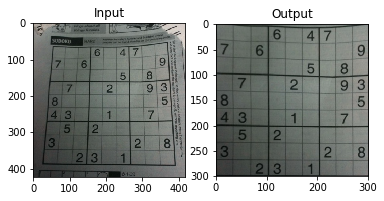

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('sudoku.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Affine transformation

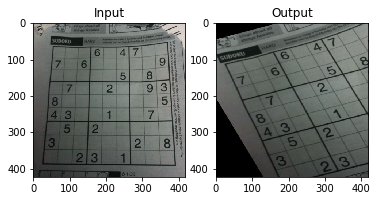

In [17]:
img = cv.imread('sudoku.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Scaling

In [21]:
import numpy as np
import cv2 as cv
img = cv.imread('messi.jpg')
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
# OR
# height, width = img.shape[:2]
# res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)
cv.imshow("Result", res)
cv.waitKey(0)
cv.destroyAllWindows()

## Translation

In [23]:
import numpy as np
import cv2 as cv
img = cv.imread('messi.jpg',0)
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

## Rotation

In [28]:
img = cv.imread('messi.jpg',0)
rows,cols = img.shape
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),220,1)
dst = cv.warpAffine(img,M,(cols,rows))

cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

## Cascade Classifier